In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math

In [47]:
df1=  pd.read_csv('AdvWorksCusts.csv')
df2=  pd.read_csv('AW_BikeBuyer.csv')

In [48]:
sum(df1['CustomerID']-df2['CustomerID'])

0

In [49]:
df = pd.concat([df1, df2['BikeBuyer']], axis =1)
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [50]:
df.shape

(16519, 24)

In [51]:
sum(df.duplicated())

98

In [52]:
df = df.drop_duplicates(keep = 'first')

In [53]:
df.shape

(16421, 24)

In [92]:
df['BikeBuyer'].value_counts()

0    10964
1     5457
Name: BikeBuyer, dtype: int64

In [55]:
df['Age'] = pd.to_datetime('1998-01-01') - pd.to_datetime(df['BirthDate'])
df['Age'] = df['Age'].astype('timedelta64[D]').astype(int)
df['Age'] = df['Age']/365
df['Age'].head(3)

0    31.756164
1    32.657534
2    32.410959
Name: Age, dtype: float64

In [56]:
df['Age'].mean()

35.97824152667822

In [57]:
def age_cat(age):
    if age <= 20:
        return 'A1'
    elif age >20 and age==30:
        return 'A2'
    elif age >30 and age ==40:
        return 'A3'
    elif age >40 and age ==50:
        return 'A4'
    elif age >50 and age ==60:
        return 'A5'
    elif age >60:
        return 'A6'
    else:
        return 'None'

In [58]:
df['Age_cat'] = df['Age'].apply(lambda x: age_cat(x))
df['Age_cat'].value_counts()

None    15131
A1        847
A6        440
A2          2
A3          1
Name: Age_cat, dtype: int64

In [59]:
df.groupby(by=['Age_cat', 'Gender'])['BikeBuyer'].count()

Age_cat  Gender
A1       F          401
         M          446
A2       M            2
A3       M            1
A6       F          223
         M          217
None     F         7496
         M         7635
Name: BikeBuyer, dtype: int64

In [60]:
df['BikeBuyer'].value_counts()

0    10964
1     5457
Name: BikeBuyer, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16421 entries, 0 to 16507
Data columns (total 26 columns):
CustomerID              16421 non-null int64
Title                   88 non-null object
FirstName               16421 non-null object
MiddleName              9461 non-null object
LastName                16421 non-null object
Suffix                  2 non-null object
AddressLine1            16421 non-null object
AddressLine2            275 non-null object
City                    16421 non-null object
StateProvinceName       16421 non-null object
CountryRegionName       16421 non-null object
PostalCode              16421 non-null object
PhoneNumber             16421 non-null object
BirthDate               16421 non-null object
Education               16421 non-null object
Occupation              16421 non-null object
Gender                  16421 non-null object
MaritalStatus           16421 non-null object
HomeOwnerFlag           16421 non-null int64
NumberCarsOwned         16421

In [62]:
df['Occupation'].value_counts()

Professional      4931
Skilled Manual    4042
Management        2721
Clerical          2598
Manual            2129
Name: Occupation, dtype: int64

In [63]:
df_new = df.drop(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
                 'PostalCode', 'PhoneNumber', 'BirthDate'], axis =1)

In [64]:
df_new.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age,Age_cat
0,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,31.756164,None
1,Seaford,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,32.657534,None
2,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,32.410959,None
3,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,29.898630,None
4,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,29.419178,None


In [65]:
df_new.shape

(16421, 15)

In [66]:
df_new.isnull().values.any()

False

In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16421 entries, 0 to 16507
Data columns (total 15 columns):
City                    16421 non-null object
StateProvinceName       16421 non-null object
CountryRegionName       16421 non-null object
Education               16421 non-null object
Occupation              16421 non-null object
Gender                  16421 non-null object
MaritalStatus           16421 non-null object
HomeOwnerFlag           16421 non-null int64
NumberCarsOwned         16421 non-null int64
NumberChildrenAtHome    16421 non-null int64
TotalChildren           16421 non-null int64
YearlyIncome            16421 non-null int64
BikeBuyer               16421 non-null int64
Age                     16421 non-null float64
Age_cat                 16421 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 2.0+ MB


In [68]:
df_new['TotalChildren'].value_counts()

0    4249
2    3168
1    3056
4    2254
3    1979
5    1715
Name: TotalChildren, dtype: int64

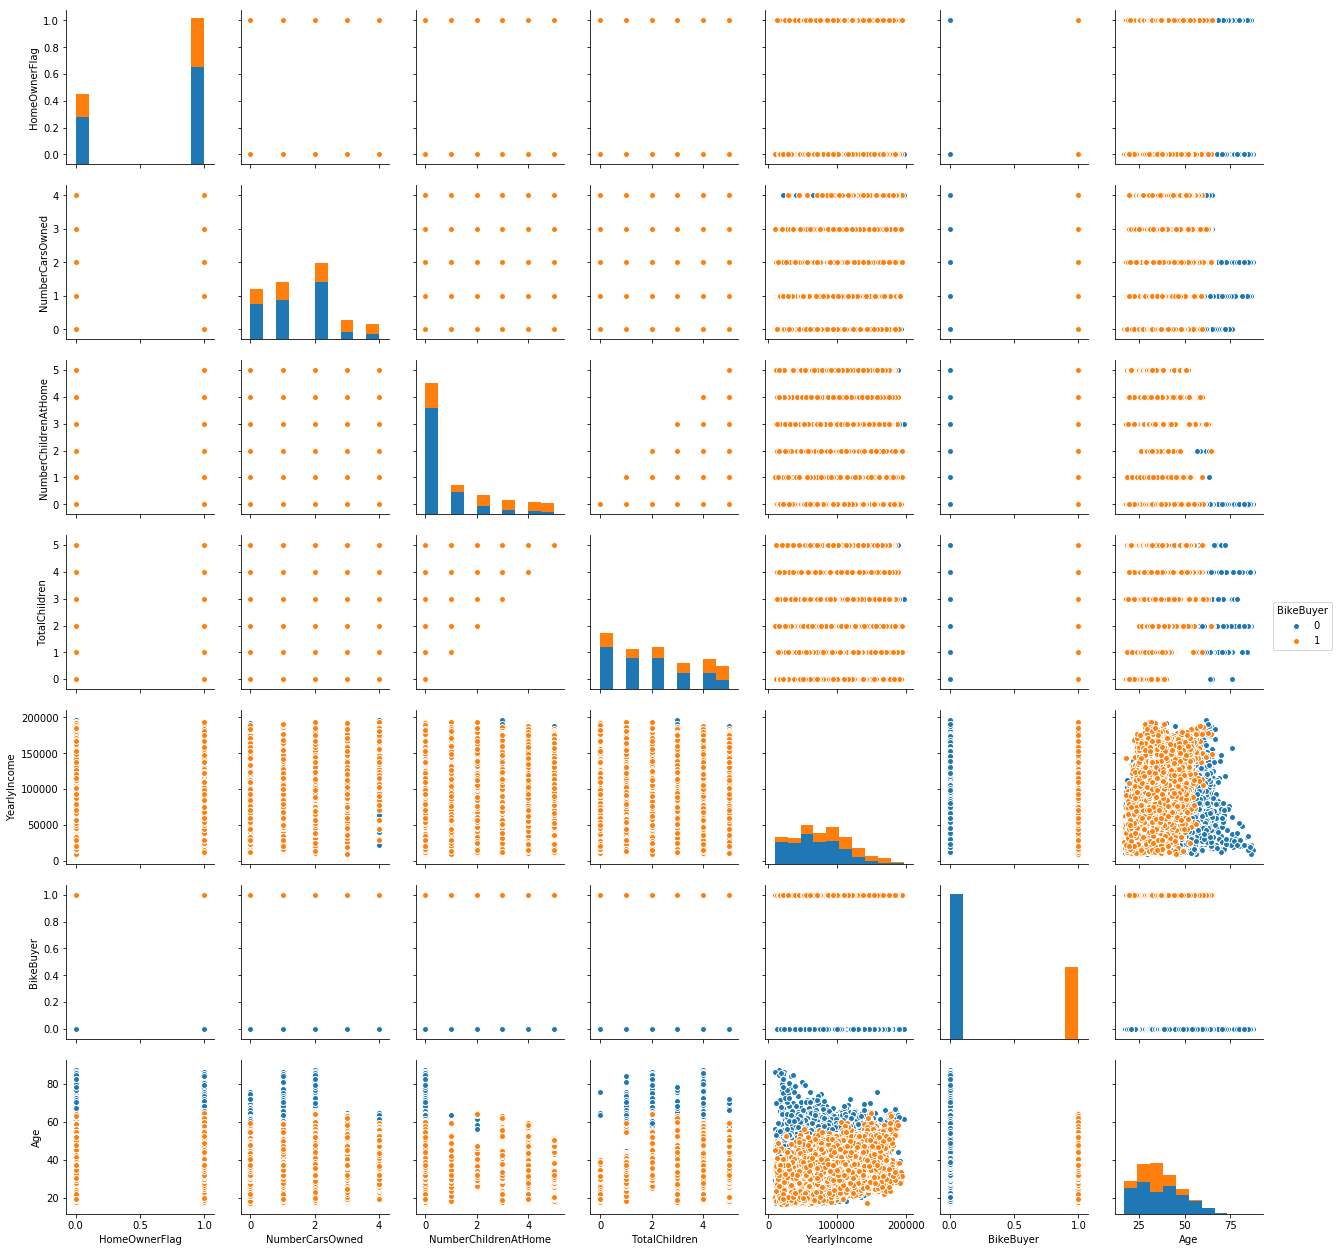

In [69]:
sns.pairplot(df_new, hue = 'BikeBuyer')

In [70]:
df_new['Age'] = df_new['Age'].apply(np.log)
df_new['YearlyIncome'] = df_new['YearlyIncome']**0.5

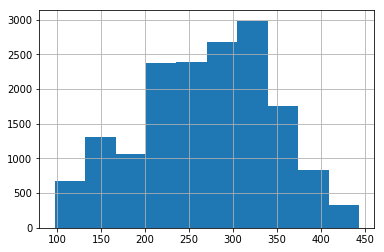

In [71]:
df_new['YearlyIncome'].hist()

In [72]:
df_new = pd.get_dummies(data=df_new, columns=['City', 'StateProvinceName', 'CountryRegionName', 'Education', 'Occupation',
                                               'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned'])

In [73]:
df_new.head()

,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,Age,Age_cat,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,...,Gender_M,MaritalStatus_M,MaritalStatus_S,HomeOwnerFlag_0,HomeOwnerFlag_1,NumberCarsOwned_0,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4
0,0,2,371.412170,0,3.458087,None,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
1,3,3,318.026728,1,3.486076,None,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,3,3,303.224339,0,3.478497,None,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
3,0,0,294.428260,0,3.397813,None,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,5,5,304.583322,1,3.381647,None,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [74]:
x = df_new.drop(['BikeBuyer', 'Age_cat'], axis =1)
y = df_new['BikeBuyer']

In [75]:
x.head()

,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,...,Gender_M,MaritalStatus_M,MaritalStatus_S,HomeOwnerFlag_0,HomeOwnerFlag_1,NumberCarsOwned_0,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4
0,0,2,371.412170,3.458087,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
1,3,3,318.026728,3.486076,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,3,3,303.224339,3.478497,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
3,0,0,294.428260,3.397813,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,5,5,304.583322,3.381647,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11494, 353)
(4927, 353)
(11494,)
(4927,)


In [77]:
sc= StandardScaler()
sc.fit(X_train[['Age', 'YearlyIncome']])
X_train[['Age', 'YearlyIncome']] = sc.transform(X_train[['Age', 'YearlyIncome']])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
X_test[['Age', 'YearlyIncome']] = sc.transform(X_test[['Age', 'YearlyIncome']])

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
X_train.head()

,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,...,Gender_M,MaritalStatus_M,MaritalStatus_S,HomeOwnerFlag_0,HomeOwnerFlag_1,NumberCarsOwned_0,NumberCarsOwned_1,NumberCarsOwned_2,NumberCarsOwned_3,NumberCarsOwned_4
10207,2,2,-1.617092,-0.577687,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
765,4,4,-0.445024,-0.047675,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
6619,1,2,0.760274,0.581326,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
12396,1,4,0.722874,0.976211,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7184,1,2,0.210400,0.945795,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [80]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression(class_weight = {0:0.33, 1:0.67})
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.33, 1: 0.67}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [95]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
probabilities = lr.predict_proba(X_test)
probabilities

array([[0.06611195, 0.93388805],
       [0.76799028, 0.23200972],
       [0.53705324, 0.46294676],
       ...,
       [0.72978393, 0.27021607],
       [0.59305952, 0.40694048],
       [0.7387965 , 0.2612035 ]])

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, roc_curve, auc

In [97]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

             precision    recall  f1-score   support

          0       0.85      0.77      0.81      7674
          1       0.62      0.74      0.67      3820

avg / total       0.78      0.76      0.77     11494

             precision    recall  f1-score   support

          0       0.85      0.77      0.81      3290
          1       0.61      0.73      0.67      1637

avg / total       0.77      0.75      0.76      4927



In [98]:
print(confusion_matrix(y_train, pred_train))
print('\n')
print(confusion_matrix(y_test, pred_test))

[[5937 1737]
 [1012 2808]]


[[2518  772]
 [ 436 1201]]


In [99]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))
#print(y_test)

[1 0 0 ... 0 0 0]


In [100]:
def print_metrics(labels, scores):
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 ScoreNotPurchased    Score Purchased')
    print('Not Purchased     %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Purchased Bike    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % accuracy_score(labels, scores))
    print(' ')
    print('             No            Yes')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred_test)  

                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased       2518               772
Purchased Bike       436              1201

Accuracy  0.75
 
             No            Yes
Num case     3290          1637
Precision    0.85          0.61
Recall       0.77          0.73
F1           0.81          0.67


No handles with labels found to put in legend.


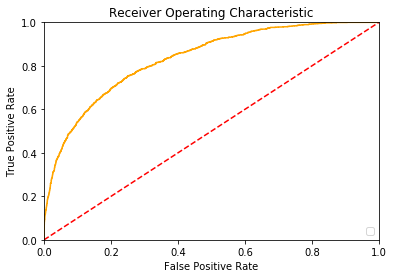

[0.99564334 0.97512766 0.97498637 ... 0.06922603 0.06899959 0.00872758]


In [101]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    #auc = auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange') # label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(threshold)
    
plot_auc(y_test, probabilities) 

In [102]:
fpr, tpr, threshold = roc_curve(y_test, probabilities[:,1])
auc_result = auc(fpr, tpr)

In [103]:
auc_result

0.8332820249065586

In [104]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased       2347               943
Purchased Bike       359              1278

Accuracy  0.74
 
             No            Yes
Num case     3290          1637
Precision    0.87          0.58
Recall       0.71          0.78
F1           0.78          0.66

For threshold = 0.4
                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased       2145              1145
Purchased Bike       295              1342

Accuracy  0.71
 
             No            Yes
Num case     3290          1637
Precision    0.88          0.54
Recall       0.65          0.82
F1           0.75          0.65

For threshold = 0.35
                 Confusion matrix
                 ScoreNotPurchased    Score Purchased
Not Purchased       1932              1358
Purchased Bike       229              1408

Accuracy  0.68
 
             No            Yes
Num case  